In [9]:
import matplotlib.pyplot as plt
import os
import pandas as pd

CARD_FACTORY_DATA_DIR = os.path.join(os.environ.get('APPDATA'), 'Godot', 'app_userdata', 'Card Factory', 'data')
TOTAL_CARD_INFO_PATH = os.path.join(CARD_FACTORY_DATA_DIR, 'CardPoolAnalysis_TotalCardInfo.csv')
CARD_INFO_HIST_PATH = os.path.join(CARD_FACTORY_DATA_DIR, 'CardPoolAnalysis_CardInfoHist.csv')
ADJ_HIST_PATH = os.path.join(CARD_FACTORY_DATA_DIR, 'CardPoolAnalysis_AdjHist.csv')
NOUN_HIST_PATH = os.path.join(CARD_FACTORY_DATA_DIR, 'CardPoolAnalysis_NounHist.csv')
NAME_HIST_PATH = os.path.join(CARD_FACTORY_DATA_DIR, 'CardPoolAnalysis_NameHist.csv')

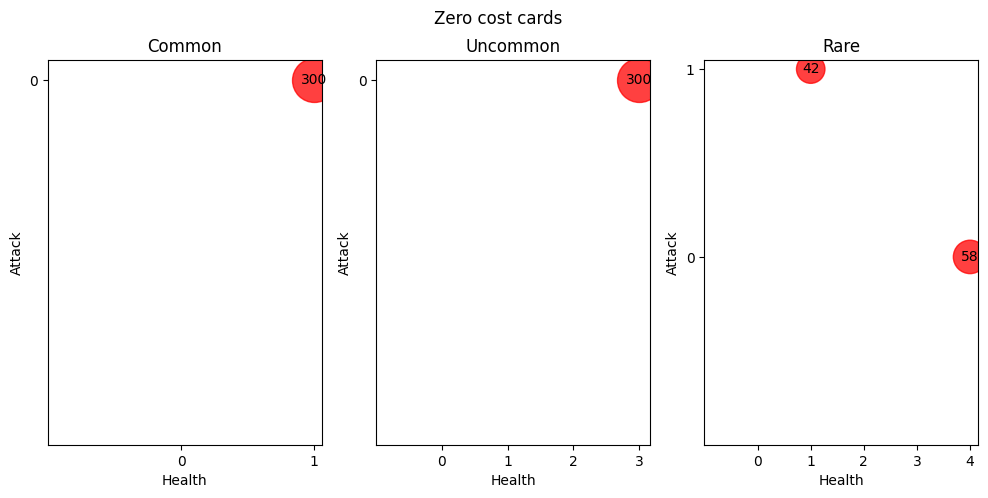

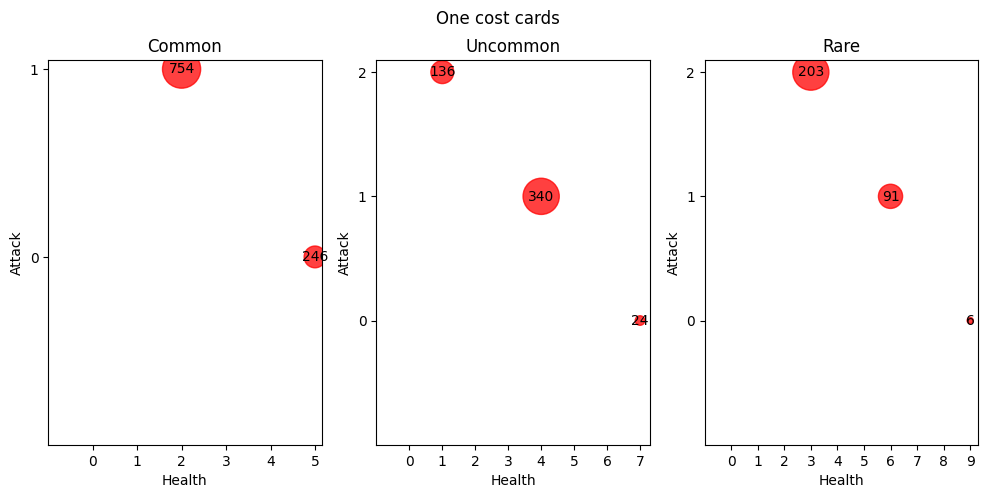

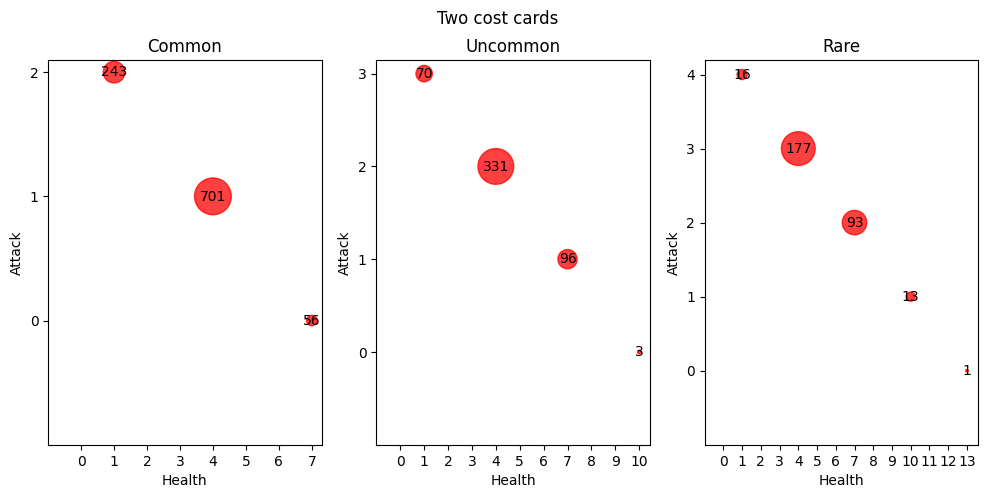

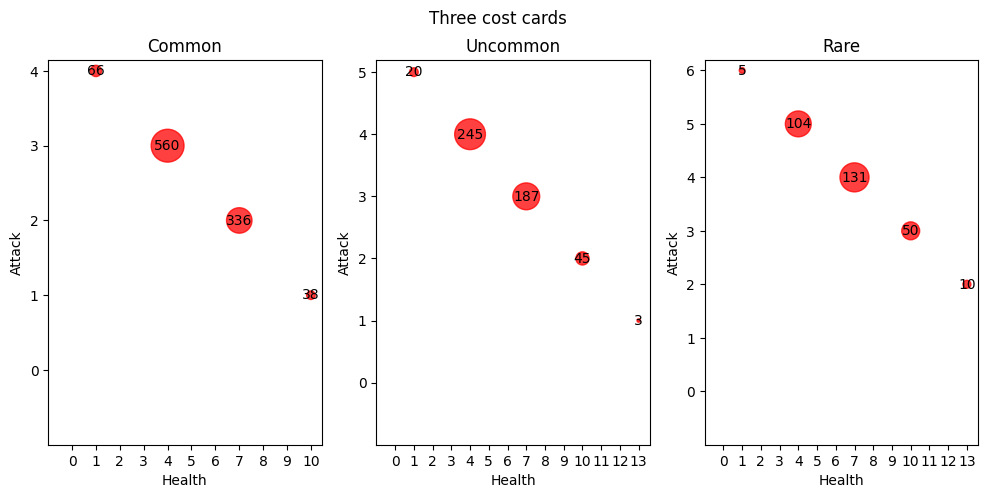

In [64]:
def plot_scatter_with_bubbles(axs, x, y, amount, title):
    axs.scatter(df['X'], df['Y'], s=df['Bubble_Count'], alpha=0.5, color='blue')

df = pd.read_csv(TOTAL_CARD_INFO_PATH, skipinitialspace=True)
for cost in ['Zero', 'One', 'Two', 'Three']:
    df_cost = df[df['BloodCost'] == cost]
    fig, axs = plt.subplots(1, 3, figsize=(12, 5))

    for i, rarity in enumerate(['Common', 'Uncommon', 'Rare']):
        df_cost_rarity = df_cost[df_cost['Rarity'] == rarity]
        x = df_cost_rarity['Health']
        y = df_cost_rarity['Attack']
        count = df_cost_rarity['Count']
        total_count = count.sum()
        normalized_count = count / total_count * 1000.0
        
        axs[i].scatter(x, y, s=normalized_count, alpha=0.75, color='red')
        for j in range(len(df_cost_rarity)):
            axs[i].text(x.iloc[j], y.iloc[j], str(count.iloc[j]), ha='center', va='center', fontsize=10)
        axs[i].set_title(rarity)
        axs[i].set_xlabel('Health')
        axs[i].set_ylabel('Attack')
        axs[i].set_xlim(left = -1)
        axs[i].set_xticks(range(0, x.max() + 1))
        axs[i].set_ylim(bottom = -1)
        axs[i].set_yticks(range(0, y.max() + 1))
    plt.suptitle(f"{cost} cost cards")
    plt.show()



# Generated Card Collisions
How often do cards in the same generated pool have the same name or the same stats?

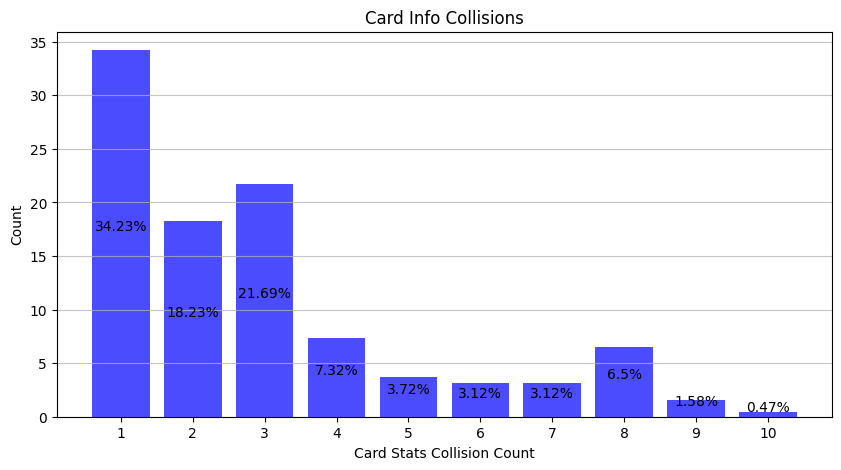

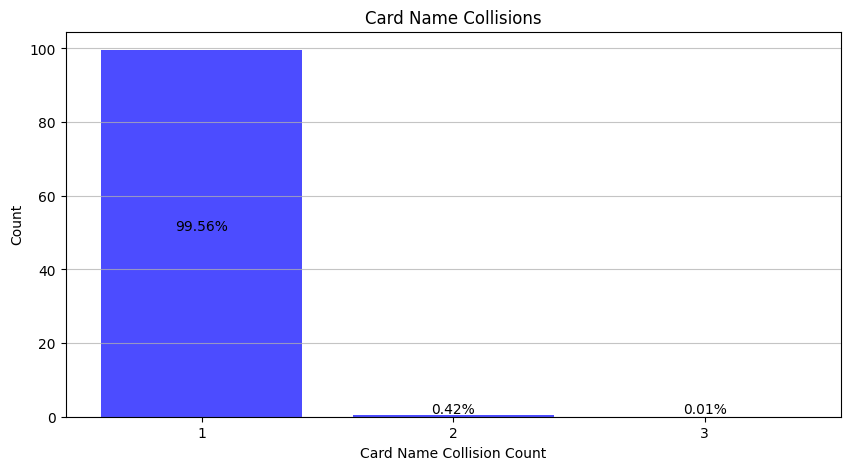

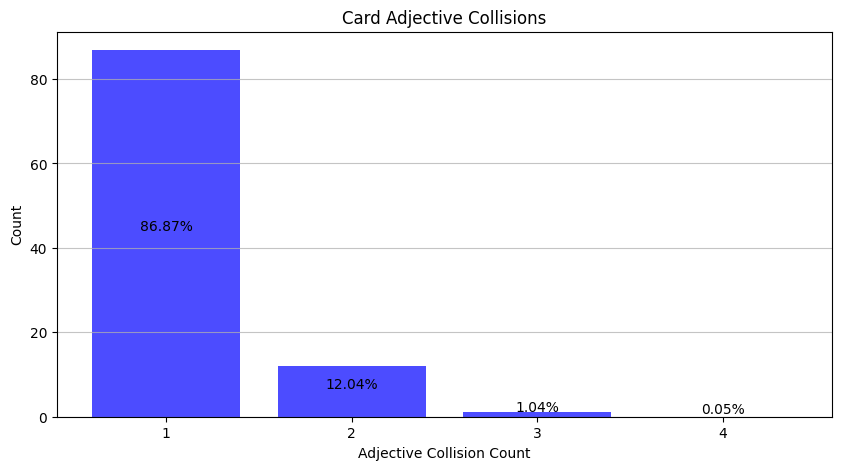

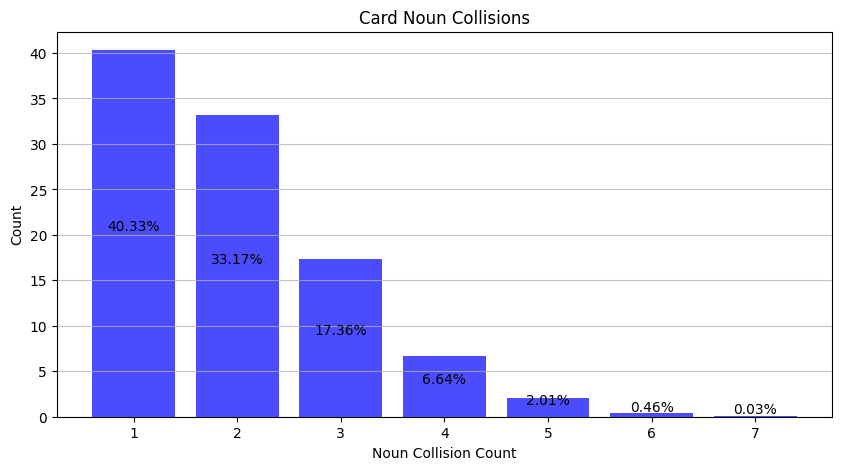

In [29]:
def plot_histogram(csv_path, histogram_name):
    df = pd.read_csv(csv_path, skipinitialspace=True)

    column_names = df.columns
    bucket_column = df[column_names[0]]
    count_column = df[column_names[1]]
    total_count = count_column.sum()
    percentage_column = (count_column / total_count) * 100.0

    plt.figure(figsize=(10, 5))
    barchart = plt.bar(bucket_column, percentage_column, color='blue', alpha=0.7) 
    plt.title(histogram_name)
    plt.xlabel(column_names[0])
    plt.xticks(bucket_column)
    plt.ylabel(column_names[1])
    plt.grid(axis='y', alpha=0.75)
    for bar in barchart:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f"{round(bar.get_height(), 2)}%", ha='center', va='bottom')

    plt.show()

plot_histogram(CARD_INFO_HIST_PATH, 'Card Info Collisions')
plot_histogram(NAME_HIST_PATH, 'Card Name Collisions')
plot_histogram(ADJ_HIST_PATH, 'Card Adjective Collisions')
plot_histogram(NOUN_HIST_PATH, 'Card Noun Collisions')